In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv('unfiltered_combat_data_df_03-30_I.csv')
display(df.head(10))

,Unnamed: 0,combat_id,start_time,number_of_rounds,player_ids,player_info,monsters_info,party_size,total_slots,total_max_slots,...,party_total_precombat_hp,party_total_postcombat_hp,party_total_hpratio,party_total_prof_bonus,party_total_strength,party_total_dexterity,party_total_constitution,party_total_intelligence,party_total_wisdom,party_total_charisma
0,0,1653718840-26eb6840-30d2-4231-a510-493e98f19b40,1.653719e+09,0,[],[],[],0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
1,1,1653817902-15ec25a2-6757-4ceb-ac41-d44352b97705,1.653818e+09,1,['209330647903743785'],"[{'hp_ratio': (65, 65), 'class': [('Ranger', 1...",[{'monster_id': 'c0cdb522-64c2-42ee-b1a8-6ef22...,1,"{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...","{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...",...,65,65,1.000000,4,14,16,12,12,14,11
2,2,1653818306-26460642-20fa-4d1f-9152-a53493cf7cb3,1.653818e+09,0,['209330647903743785'],"[{'hp_ratio': (65, 65), 'class': [('Ranger', 1...",[],1,"{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...","{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...",...,65,65,1.000000,4,14,16,12,12,14,11
3,3,1653819786-0644834c-bd73-43a3-98bb-6a36fa3c0fca,1.653820e+09,1,[],[],[{'monster_id': '4e0200d1-3fc1-4d96-97cc-3db4d...,0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
4,4,1653820492-5e967803-0dfc-44a3-aaf6-8a2637750af0,1.653820e+09,0,[],[],[],0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
5,5,1653820568-5c545c92-95ac-4c7f-b677-0276489affbe,1.653821e+09,0,[],[],[],0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
6,6,1653820676-2737863e-d1fe-4249-99a2-2fce622a5b73,1.653821e+09,0,[],[],[],0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
7,7,1653820936-807a2ff0-373e-41bf-854e-6799815211ed,1.653821e+09,0,[],[],[],0,{},{},...,0,0,NaN,0,0,0,0,0,0,0
8,8,1653853909-2a642a70-bfca-4daa-8056-61d5198075f9,1.653854e+09,0,['142344480852772526'],"[{'hp_ratio': (57, 72), 'class': [('Bard', 7),...",[],1,"{'1': 5, '2': 2, '3': 3, '4': 1, '5': 0, '6': ...","{'1': 6, '2': 3, '3': 3, '4': 1, '5': 0, '6': ...",...,72,57,0.791667,4,11,17,12,12,12,20
9,9,1653856349-96235919-cd9d-4a0d-9ea9-9a15cf968979,1.653856e+09,0,[],[],[{'monster_id': 'f501c8ae-3303-49ad-816e-28af0...,0,{},{},...,0,0,NaN,0,0,0,0,0,0,0


In [68]:
#lets apply some filters to the data
#Player number  <10? (more than 10 players is not representative of usual common dnd party size, removes less then 10 combats from our dataset)
#Individual Player combined class level <20 (dnd 5e rules don't allow more than 20)
#Player max starting hp  350 ( Kane calculated max barbarian (highest hit die), with tough feat hp as per dnd 5e rules)
#Individual AC 38 (max possible reasonable ac achievable in dnd 5e rules)
#not more than an ability score 22 for all abilities ( as per raw dnd 5e rules)

filtered_df = df[df['number_of_rounds'] > 0]

In [69]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")


Number of combats lost to the filter: 2214


In [70]:
filtered_df = filtered_df[filtered_df['party_size'] <= 10]

In [71]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 2231


In [72]:
filtered_df = filtered_df[filtered_df['party_total_level']/filtered_df['party_size']  <= 20]

In [73]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 4742


In [74]:
filtered_df = filtered_df[filtered_df['party_total_ac']/filtered_df['party_size']  <= 38]

In [75]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 4787


In [76]:
filtered_df = filtered_df[filtered_df['party_total_precombat_hp']/filtered_df['party_size'] <350]

In [77]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")

Number of combats lost to the filter: 4891


In [78]:
filtered_df['avg_party_level'] = filtered_df['party_total_level'] / filtered_df['party_size']
filtered_df['avg_monster_level'] = filtered_df['monster_total_level'] / filtered_df['monster_number']
filtered_df['avg_hp_ratio'] = filtered_df['party_total_postcombat_hp'] /filtered_df['party_total_precombat_hp']


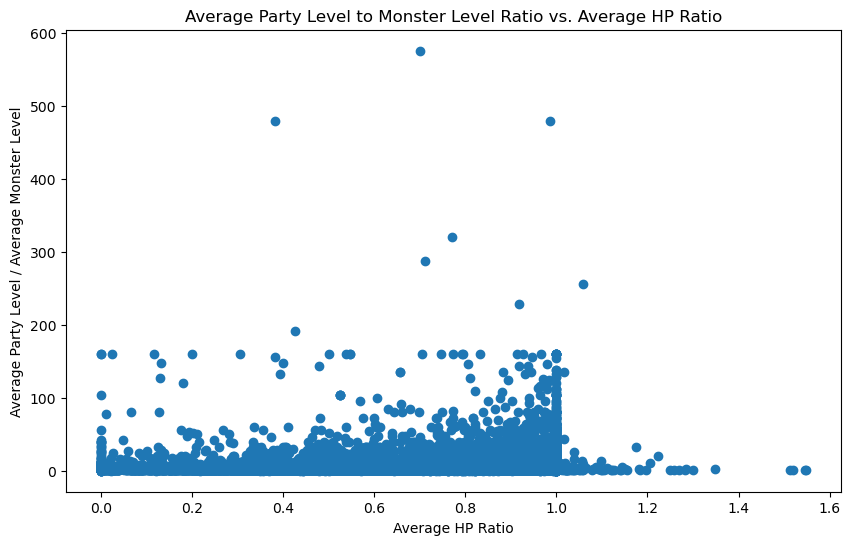

In [79]:
import matplotlib.pyplot as plt

filtered_df['avg_monster_level'].replace(0, np.nan, inplace=True)

# Calculate the ratio of average party level to average monster level
filtered_df['level_ratio'] = filtered_df['avg_party_level'] / filtered_df['avg_monster_level']


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['avg_hp_ratio'],filtered_df['level_ratio'])
plt.ylabel('Average Party Level / Average Monster Level')
plt.xlabel('Average HP Ratio')
plt.title('Average Party Level to Monster Level Ratio vs. Average HP Ratio')
plt.show()


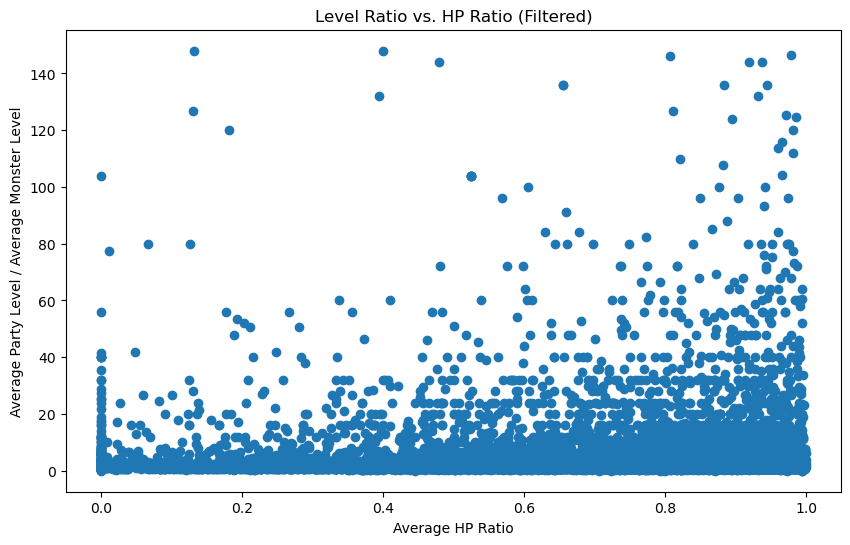

In [80]:


# extra filtering removing all the "outliers"
filtered_df = filtered_df[(filtered_df['level_ratio'] < 150) & (filtered_df['avg_hp_ratio'] < 1)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['avg_hp_ratio'],filtered_df['level_ratio'])
plt.ylabel('Average Party Level / Average Monster Level')
plt.xlabel('Average HP Ratio')
plt.title('Level Ratio vs. HP Ratio (Filtered)')
plt.show()


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = filtered_df[['avg_party_level', 'party_size', 'avg_monster_level', 'monster_number']]
y = filtered_df['avg_hp_ratio']

# Splitting the data into training and testing , 80-20 split???
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0689948570927267


In [82]:
#ok lets try few different models firs DeciwsionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse}")


Decision Tree MSE: 0.08783017853414946


In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 0.05944845522652199


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")


Gradient Boosting MSE: 0.058429604173474106


In [85]:
from sklearn.linear_model import PoissonRegressor

poisson_model = PoissonRegressor()
poisson_model.fit(X_train, y_train)

poisson_predictions = poisson_model.predict(X_test)
poisson_mse = mean_squared_error(y_test, poisson_predictions)
print(f"Poisson Regressor MSE: {poisson_mse}")


Poisson Regressor MSE: 0.06909075196000734


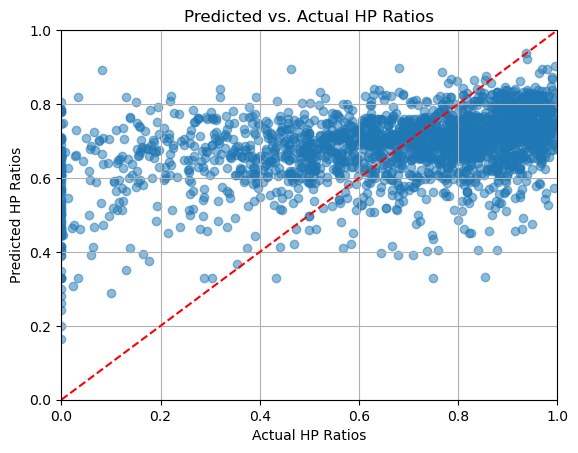

In [86]:

plt.scatter(y_test, gb_predictions, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()


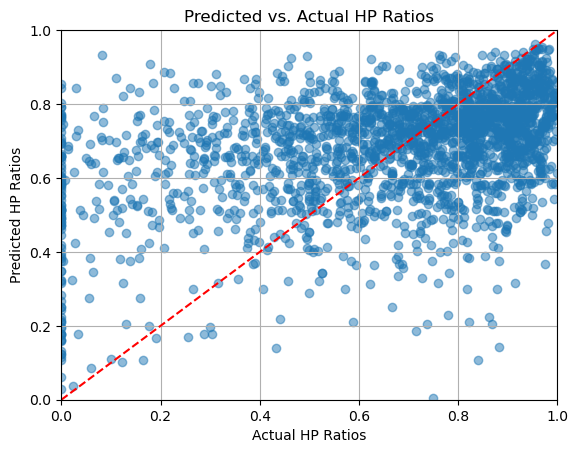

In [87]:
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [88]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
print(f"Neural Network MSE: {nn_mse}")


Neural Network MSE: 0.06794811865853363


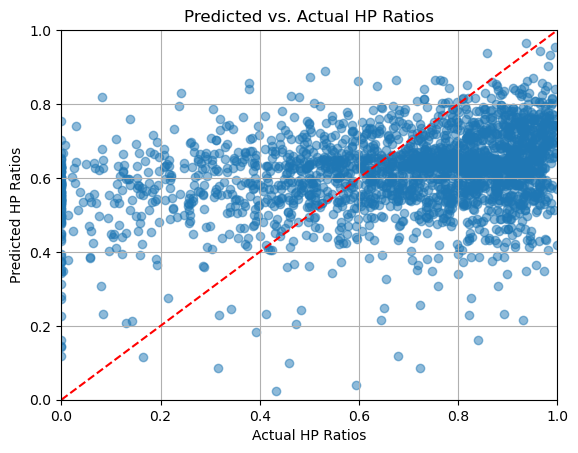

In [89]:
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [92]:
#ok soooo i need to transform something here.. lets try log? to make it more linear?

y_train_log = np.log(y_train + 1)  # Adding 1 to avoid zero
y_test_log = np.log(y_test + 1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train_log)

log_predictions = linear_model.predict(X_test)
predictions = np.exp(log_predictions) - 1  # Inverse of the log transformation

mse = mean_squared_error(y_test, predictions)
print(f"Linear Regression with Log Transformation MSE: {mse}")


Linear Regression with Log Transformation MSE: 0.06860389137108615


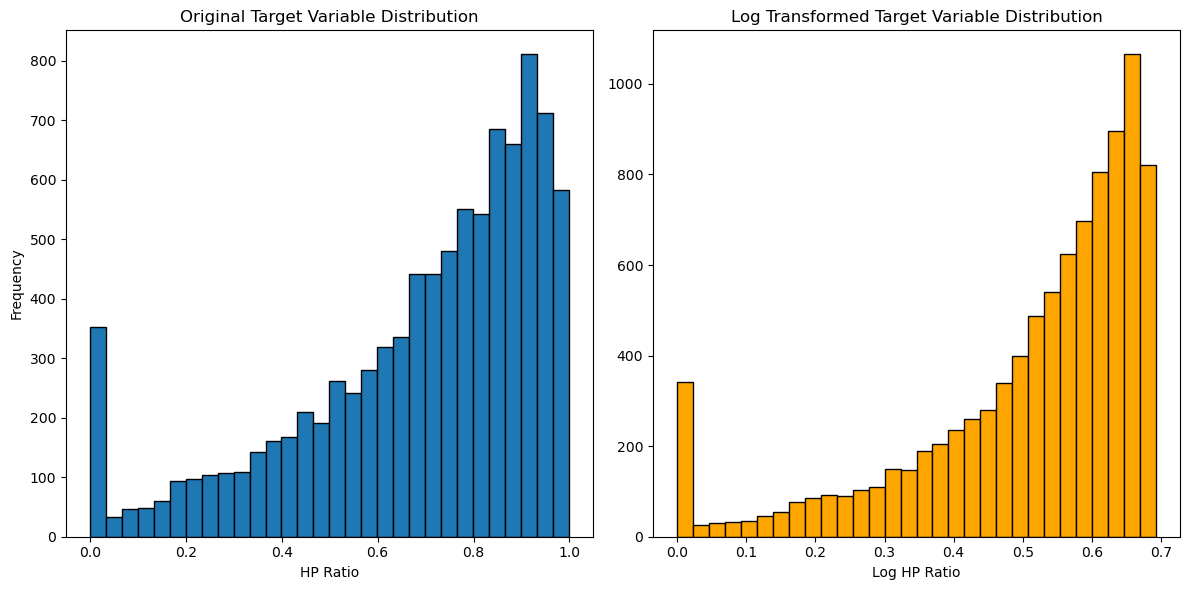

In [93]:
plt.figure(figsize=(12, 6))

# Original Distribution
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, edgecolor='black')
plt.title('Original Target Variable Distribution')
plt.xlabel('HP Ratio')
plt.ylabel('Frequency')

# Log Transformed Distribution
plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=30, edgecolor='black', color='orange')
plt.title('Log Transformed Target Variable Distribution')
plt.xlabel('Log HP Ratio')

plt.tight_layout()
plt.show()


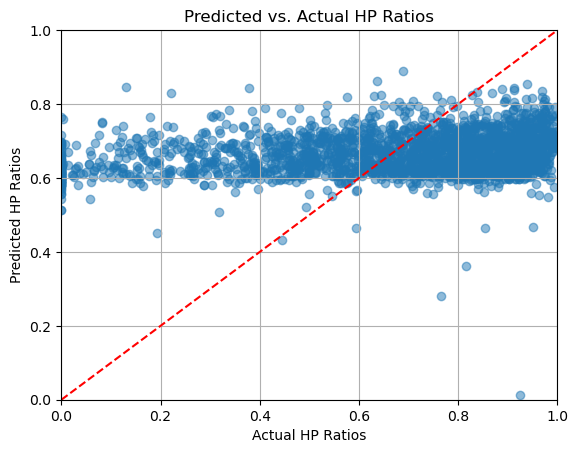

In [94]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [97]:
newfiltered_df= filtered_df[filtered_df['avg_hp_ratio']> 0.02]

In [98]:
#ok that little tail next to zero annoys me i will cut it out! why not...
Xnew = filtered_df[['avg_party_level', 'party_size', 'avg_monster_level', 'monster_number']]
ynew = filtered_df['avg_hp_ratio']

# Splitting the data into training and testing , 80-20 split???
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xnew, ynew, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_trainnew, y_trainnew)

y_prednew = model.predict(X_testnew)
mse = mean_squared_error(y_testnew, y_prednew)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0689948570927267


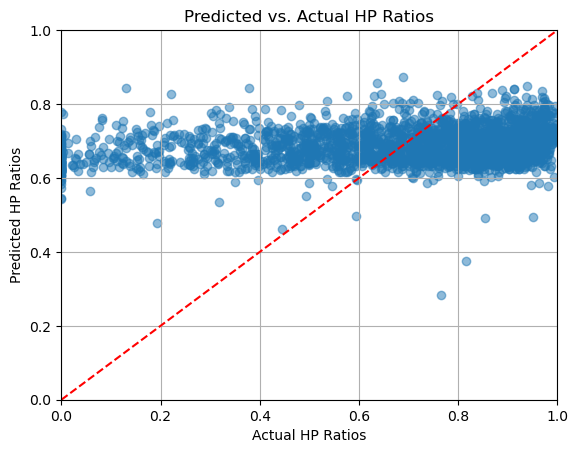

In [99]:
plt.scatter(y_testnew, y_prednew, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [100]:

#gb_model = GradientBoostingRegressor()
gb_model.fit(X_trainnew, y_trainnew)

gb_predictionsnew = gb_model.predict(X_testnew)
gb_msenew = mean_squared_error(y_testnew, gb_predictionsnew)
print(f"Gradient Boosting MSE: {gb_msenew}")

Gradient Boosting MSE: 0.058429604173474106


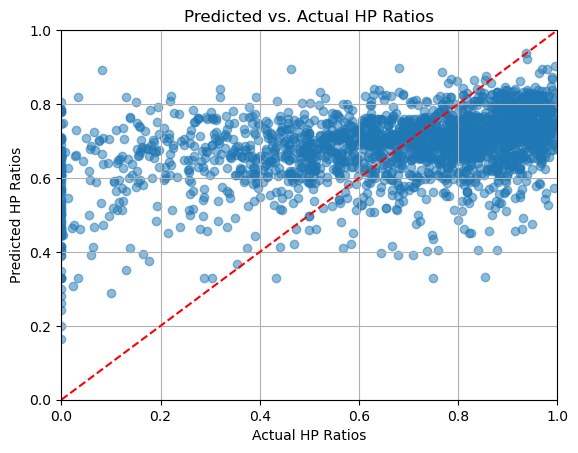

In [101]:
plt.scatter(y_testnew, gb_predictionsnew, alpha=0.5)
plt.xlabel('Actual HP Ratios')
plt.ylabel('Predicted HP Ratios')
plt.title('Predicted vs. Actual HP Ratios')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

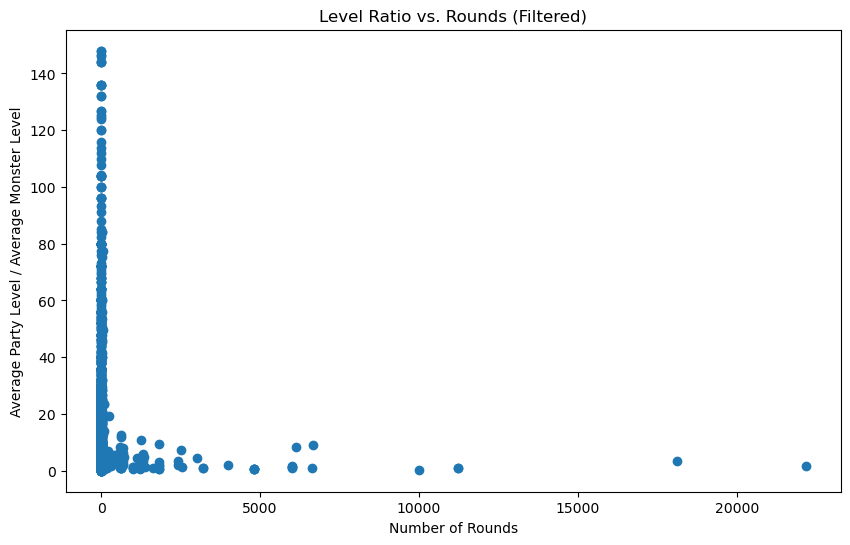

In [25]:


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['number_of_rounds'],filtered_df['level_ratio'])
plt.ylabel('Average Party Level / Average Monster Level')
plt.xlabel('Number of Rounds')
plt.title('Level Ratio vs. Rounds (Filtered)')
plt.show()


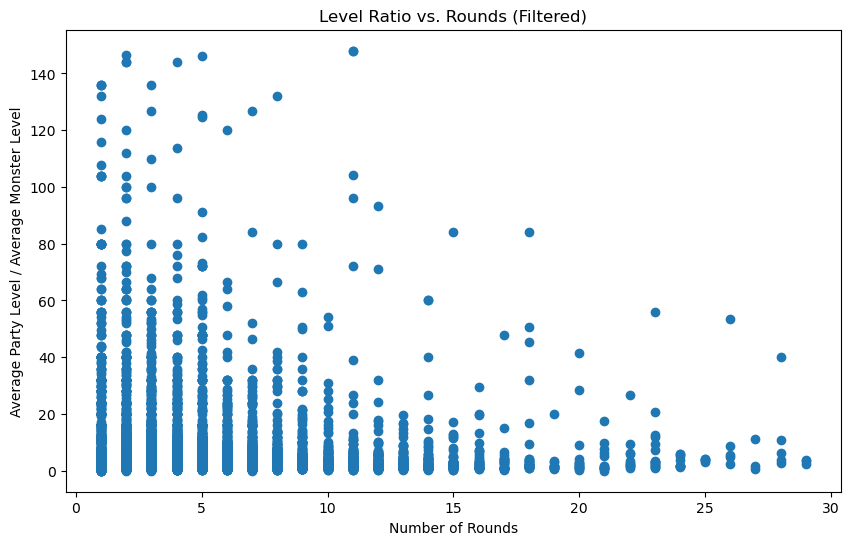

In [30]:
# extra filtering removing all the "outliers" from rounds
filtered_df = filtered_df[(filtered_df['number_of_rounds'] < 60)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['number_of_rounds'],filtered_df['level_ratio'])
plt.ylabel('Average Party Level / Average Monster Level')
plt.xlabel('Number of Rounds')
plt.title('Level Ratio vs. Rounds (Filtered)')
plt.show()